# Remote Sensing Image processing
---

One image (in Remote Sensing, usually called *raster*) can be stored in different forms. One of them is using individual storage, one file for each band. In this case, a single file will contain the metadata for a single band. The metadata of a raster file includes information about the coordinate system, the geographic boundaries represented by the image, and the data type of the image pixels.

Consider the following exemple of CBERS-04A satellite:

* CBERS_4A_WPM_20200612_200_139_L4_BAND1.tif: Band 1 (blue)

* CBERS_4A_WPM_20200612_200_139_L4_BAND2.tif: Band 2 (green)

* CBERS_4A_WPM_20200612_200_139_L4_BAND3.tif: Band 3 (red)

<img src=https://prog-geo.github.io/_images/raster-unica-banda.png>

A second form is to store several bands in the same file. In this case, the set of metadata will be one for all the bands.

For example, it is possible to generate a single GeoTIFF file, containing 4 bands from CBERS-04A (1, 2, 3 and 4):

<img src=https://prog-geo.github.io/_images/raster-multiplas-bandas.png>

*The color association of the 2 previous figures is only to illustrate the concepts. A raster file can contain more than 3 or 4 bands (indeed can contain hundreds), but this must be supported by its file format.*

# How to write algorithms to deal with images?
---

We create algorithms to read and write numbers, stored in matrices.

<img src="https://github.com/tkorting/remote-sensing-images/raw/master/algorithms-to-read-write-rasters.png" width=800>

We can use several programming languages and libraries to load imagery information and retrieve those matrices.

In Python:
* opencv (https://opencv.org/)
* rasterio (https://rasterio.readthedocs.io/)
* GDAL (https://gdal.org/)
* ...



# Download sample image

In [ ]:
# this repository contains some crops of remote sensing
# images, that we can download (using wget every time we
# start this colab) and use in our exercises
raster_filename = 'heliponto_2.tif'
!wget https://github.com/tkorting/remote-sensing-images/raw/master/{raster_filename}

--2024-09-25 13:17:14--  https://github.com/tkorting/remote-sensing-images/raw/master/heliponto_2.tif
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tkorting/remote-sensing-images/master/heliponto_2.tif [following]
--2024-09-25 13:17:14--  https://raw.githubusercontent.com/tkorting/remote-sensing-images/master/heliponto_2.tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 122951 (120K) [image/tiff]
Saving to: ‘heliponto_2.tif’

heliponto_2.tif     100%[===================>] 120.07K  --.-KB/s    in 0.02s   

2024-09-25 13:17:14 (5.72 MB/s) - ‘heliponto_2.tif’ saved [122951/122951]



# Loading 1-band image in OpenCV

In [ ]:
import cv2

opencv_matrix = cv2.imread(raster_filename, cv2.IMREAD_GRAYSCALE)

print(opencv_matrix.shape)
print(type(opencv_matrix))

(334, 359)
<class 'numpy.ndarray'>


# Loading 1-band image in rasterio

In [ ]:
try:
  import rasterio as rio
except:
  # rasterio is not installed by default in google colab
  !pip install rasterio
  import rasterio as rio

with rio.open(raster_filename) as rio_raster:
  rio_matrix = rio_raster.read(1)

  print(type(rio_raster))
  print(rio_matrix.shape)
  print(type(rio_matrix))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 33.2 MB/s eta 0:00:00
<class 'rasterio.io.DatasetReader'>
(334, 359)
<class 'numpy.ndarray'>


# Loading 1-band image in GDAL

In [ ]:
from osgeo import gdal

gdal_raster = gdal.Open(raster_filename, gdal.GA_ReadOnly)
gdal_band = gdal_raster.GetRasterBand(1)
gdal_matrix = gdal_band.ReadAsArray()

print(type(gdal_raster))
print(gdal_matrix.shape)
print(type(gdal_matrix))

<class 'osgeo.gdal.Dataset'>
(334, 359)
<class 'numpy.ndarray'>


# Display 1-band image using matploblib

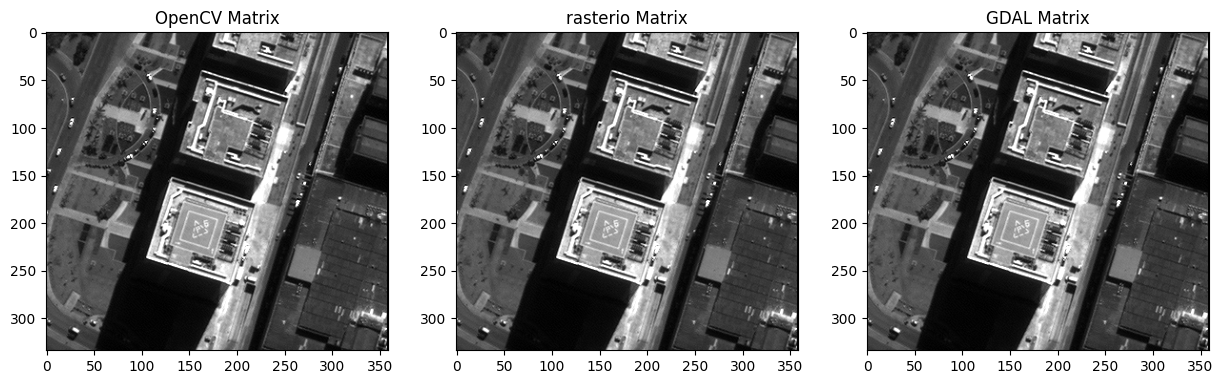

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 35))

plt.subplot(131)
plt.imshow(opencv_matrix, cmap = 'gray')
plt.title('OpenCV Matrix')

plt.subplot(132)
plt.imshow(rio_matrix, cmap = 'gray')
plt.title('rasterio Matrix')

plt.subplot(133)
plt.imshow(gdal_matrix, cmap = 'gray')
plt.title('GDAL Matrix')

plt.show()

# Displaying pixels as numbers



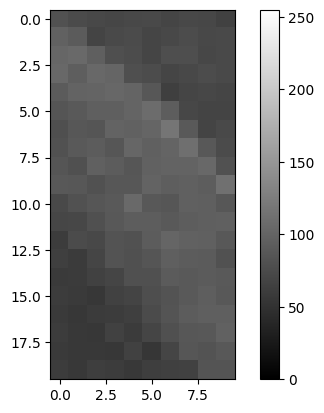

[[ 82  75  72  70  72  73  69  72  71  65]
 [ 97  91  68  74  75  69  72  76  72  74]
 [102 106  95  79  76  69  78  78  71  73]
 [104  94 104 101  79  76  69  72  76  73]
 [ 91  99 100 103 100  87  63  69  71  69]
 [ 85  89  95  95 100 108  93  71  68  68]
 [ 79  87  85  99  97 101 117  89  68  74]
 [ 82  90  92  86 102  96 100 111  88  75]
 [ 85  80  96  92  86  98  99  99 104  81]
 [ 88  87  82  87  87  99  94  96  93 112]
 [ 74  82  86  90 105  88  86  96  95  87]
 [ 70  71  80  88  93  93  89  93  95  96]
 [ 60  75  72  83  82  92 101  98  96  88]
 [ 63  59  69  83  80  85  95  92  91  81]
 [ 58  59  65  69  80  80  91  89  91  90]
 [ 61  58  55  66  68  78  83  90  94  88]
 [ 58  55  59  60  63  75  84  92  95  95]
 [ 60  56  55  65  59  69  80  87  88  98]
 [ 58  56  57  55  65  54  69  86  83  88]
 [ 60  57  62  60  56  62  64  65  84  84]]


In [ ]:
import matplotlib.pyplot as plt

# define an example block with size 20 x 10
block_matrix = rio_matrix[20:40, 15:25]

plt.figure()
plt.imshow(block_matrix, cmap = 'gray', vmin=0, vmax=255)
plt.colorbar()
plt.show()

print(block_matrix)

# Spatial Filtering
---

In Convolutional Neural Networks, one important operation is the convolution, which was already important in Digital Image Processing for filtering operations.

The **kernel**, which is usually a square grid, is one key element for convolution, and it has certain parameters:
* *width*: the number of columns in the kernel
* *height*: the number of lines in the kernel
* *weights* ($\omega_i, i = 1, \dots N$): every element of the kernel will has a specific value, and the output depends on all kernel's values
* $N$ is *width* x *height*



In [ ]:
# display video about spatial filtering
%%HTML
<center><iframe width="800" height="500" src="https://www.youtube.com/embed/hRtmSh2gF48?start=42" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe></center>

# Convolution
---

> *This section is based on [chollet2018].*

Convolution layers learn local patterns. In the case of images, patterns found in small 2D windows of the inputs.

Convolutions operate over feature maps, with two spatial axes (height and width) as well as a depth axis (also called the channels axis).

* black-and-white picture, the depth is 1
* RGB image, dimension of the depth axis is 3
* for a CBERS-4A MUX image, the depth is 4 (blue, green, red, nir)

The convolution operation extracts patches from its input feature map and applies the same transformation to all of these patches, producing an output feature map.

A convolution works by sliding windows of predefined size (examples 3x3, 5x5) over the 3D input feature map, transforming (via a tensor product with some weight matrix, the **convolution kernel**) into a 1D vector.

# Applying convolution to one image
---

The output of a convolution is computed by $\sum_{i=1}^N x_i \times \omega_i$, where $x_i, i = 1, \dots N$ are the pixels in a local window with the same size of the kernel.

Recall the output $z$ of *one artificial neuron*

<img src="https://github.com/tkorting/remote-sensing-images/raw/master/the_artificial_neuron.png" width=500>

$z = f(\sum_{i=1}^N x_i \times \omega_i + b)$

and the convolution output:

$\sum_{i=1}^N x_i \times \omega_i$

# Exercise 1

Create a convolution kernel called `average_kernel` as a `numpy array` with the following parameters:
* width: 15
* height: 15
* weights: all values equal to 1 / (15 * 15) or `~0.00444`

then apply it to `raster_filename`.

Display, using `matplotlib`, the input (`rio_matrix`) and output (`conv_matrix`) images.

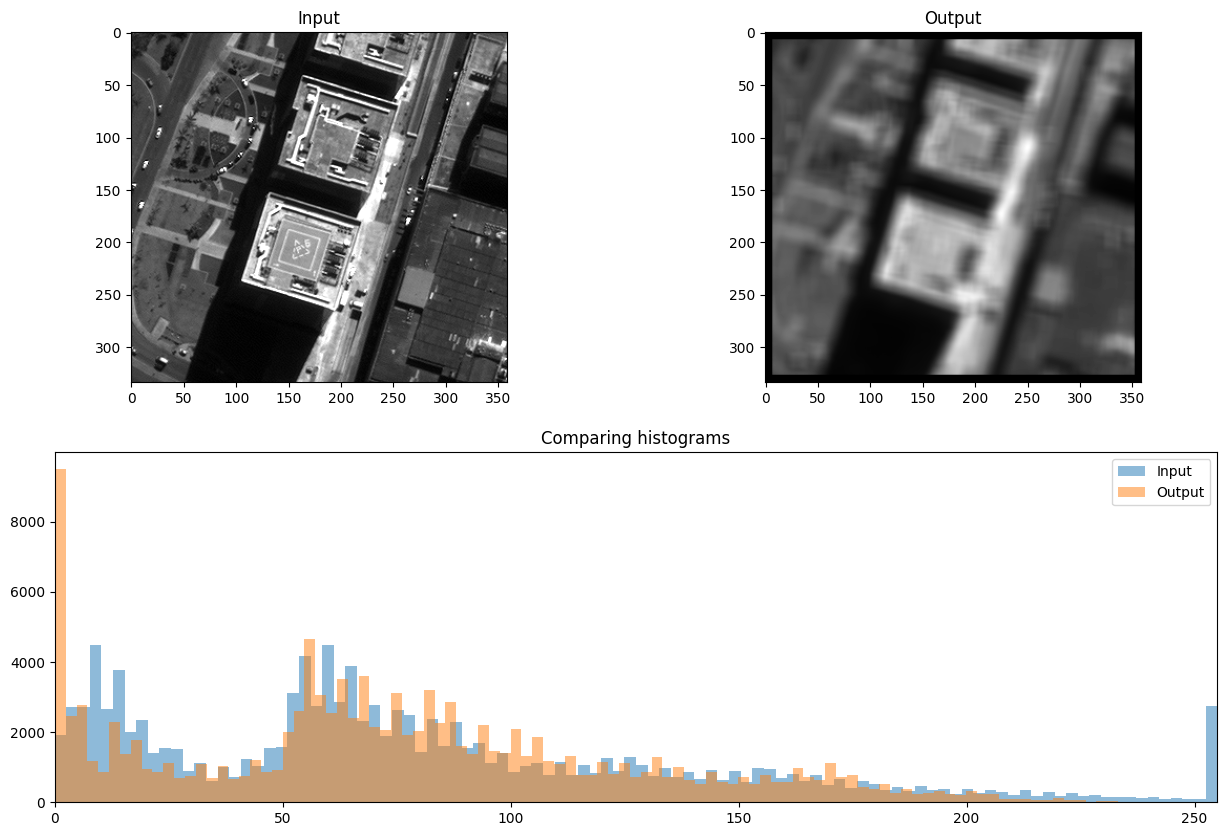

In [ ]:
import numpy as np

input_matrix = rio_matrix.copy()
Height = input_matrix.shape[0]
Width = input_matrix.shape[1]

# parameters
kernel_height = 15
kernel_width = 15
N = kernel_height * kernel_width
half_kernel_height = int(kernel_height / 2)
half_kernel_width = int(kernel_width / 2)

# define kernel and its flattened version
# to be used in convolution
average_kernel = np.ones((kernel_height, kernel_width)) / N
average_kernel_flatten = average_kernel.flatten()

# create convolution matrix with zeros and
# the same size of input_matrix
conv_matrix = np.zeros_like(input_matrix)
for row in range(half_kernel_height, Height - half_kernel_height):
  for column in range(half_kernel_width, Width - half_kernel_width):
    sub_matrix = input_matrix[row - half_kernel_height : row + half_kernel_height + 1,
                              column - half_kernel_width : column + half_kernel_width + 1]
    conv_matrix[row, column] = np.dot(sub_matrix.flatten(), average_kernel_flatten)

# display input and output
plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.imshow(input_matrix, cmap = 'gray')
plt.title('Input')

plt.subplot(222)
plt.imshow(conv_matrix, cmap = 'gray')
plt.title('Output')

# display input and output histograms
plt.subplot(212)
plt.hist(input_matrix.flatten(), bins=100, label='Input', alpha=0.5)
plt.hist(conv_matrix.flatten(), bins=100, label='Output', alpha=0.5)
plt.legend()
plt.xlim([0,255])
plt.title('Comparing histograms')

plt.show()

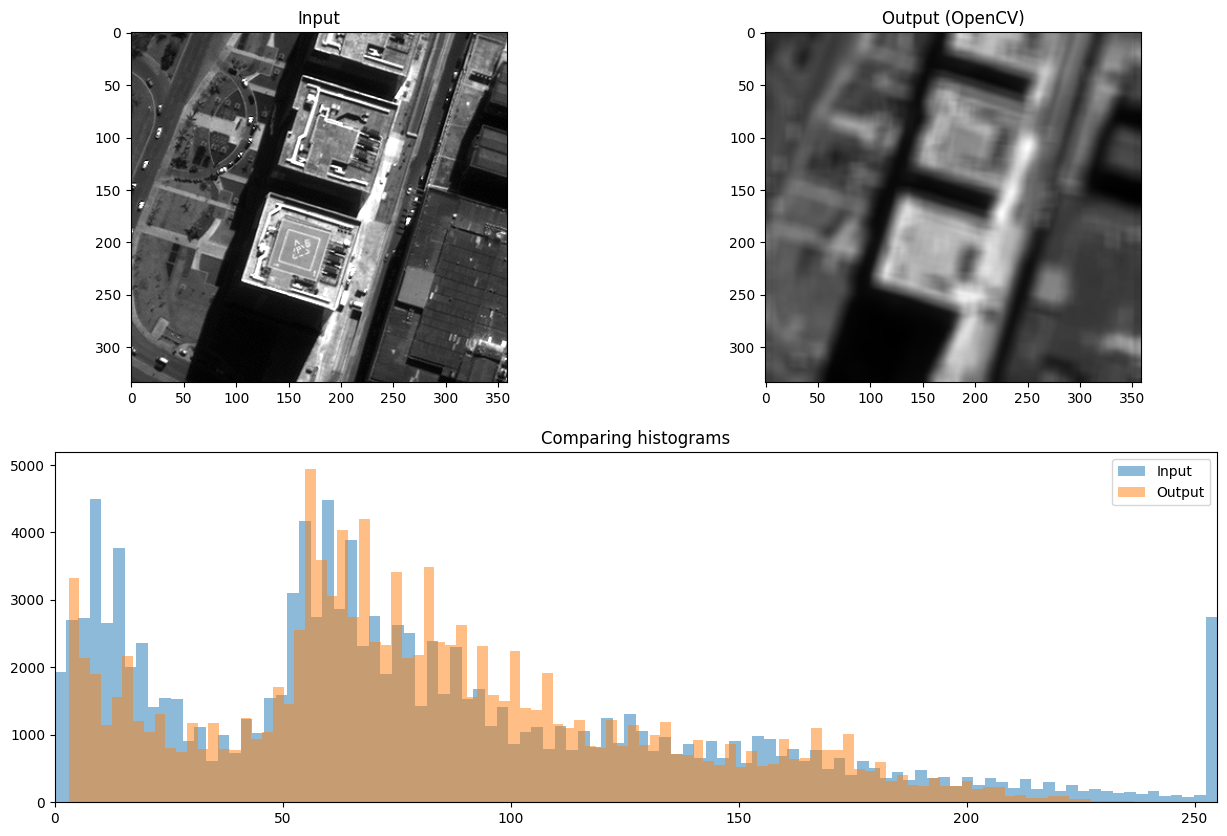

In [ ]:
# using opencv
# http://www.opencv.org.cn/opencvdoc/2.3.2/html/modules/imgproc/doc/filtering.html?highlight=filter2d#filter2d
conv_matrix_opencv = cv2.filter2D(input_matrix, -1, average_kernel)

# display input and output
plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.imshow(input_matrix, cmap = 'gray')
plt.title('Input')

plt.subplot(222)
plt.imshow(conv_matrix_opencv, cmap = 'gray')
plt.title('Output (OpenCV)')

# display input and output histograms
plt.subplot(212)
plt.hist(input_matrix.flatten(), bins=100, label='Input', alpha=0.5)
plt.hist(conv_matrix_opencv.flatten(), bins=100, label='Output', alpha=0.5)
plt.legend()
plt.xlim([0,255])
plt.title('Comparing histograms')

plt.show()

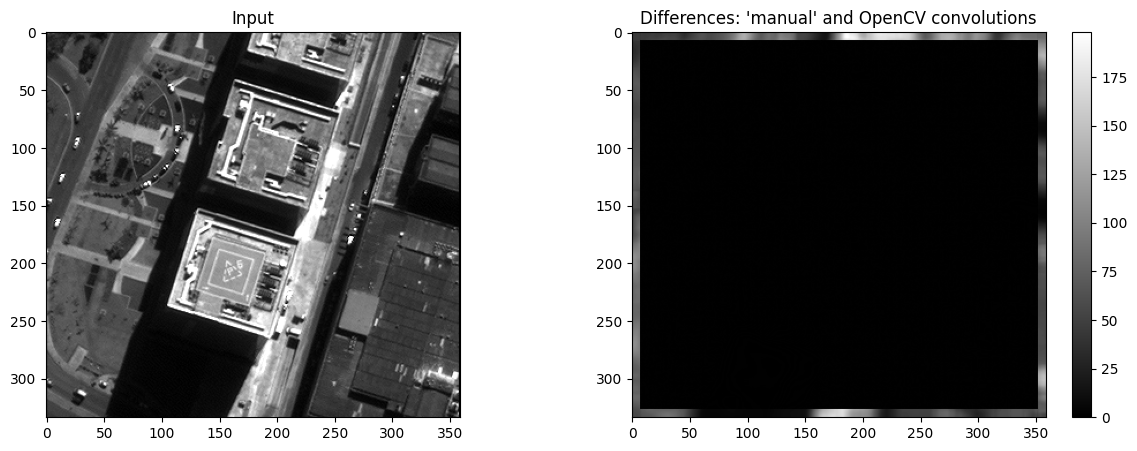

In [ ]:
# display differences between both convolutions
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(input_matrix, cmap = 'gray')
plt.title('Input')

plt.subplot(122)
plt.imshow(conv_matrix_opencv.astype(int) - conv_matrix, cmap = 'gray') #, vmin=0, vmax=100)
plt.colorbar()
plt.title('Differences: \'manual\' and OpenCV convolutions')

plt.show()

## No-Padding effect

Notice the artificial border produced in the output `conv_matrix`. This effect is because the algorithm can't find all neighbors to process line 0 column 0, for example.

<img src="https://github.com/tkorting/remote-sensing-images/raw/master/need_for_padding.jpg">

To reduce this effect, we can use *padding*, by adding in the input image enough rows/columns in the borders.

From **Exercise 1**, implement padding and display, using `matplotlib`, the input (`rio_matrix`) with padding, and output (`conv_matrix_padding`) images.

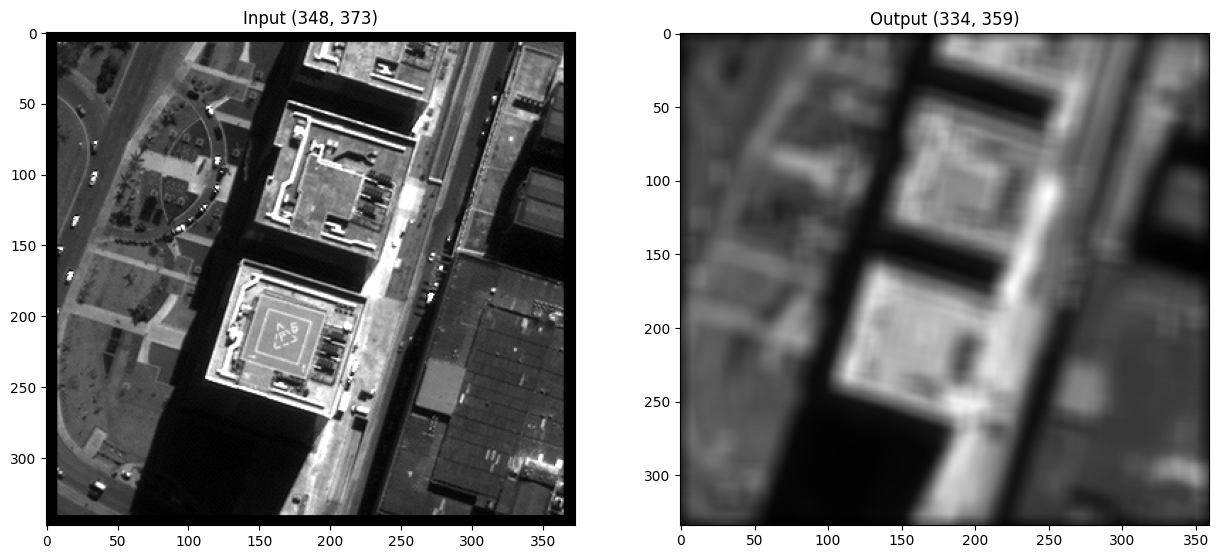

In [ ]:
# create input_matrix with extra rows/columns
# considering half of the kernel size - 1
input_matrix_padding = np.zeros((Height + kernel_height - 1,
                                 Width + kernel_width - 1))
input_matrix_padding[half_kernel_height : input_matrix_padding.shape[0] - half_kernel_height,
                     half_kernel_width : input_matrix_padding.shape[1] - half_kernel_width] = input_matrix.copy()


# create convolution matrix with zeros and
# the same size of input_matrix_padding
conv_matrix_padding = np.zeros_like(input_matrix_padding).astype(int)
for row in range(half_kernel_height, input_matrix_padding.shape[0] - half_kernel_height):
  for column in range(half_kernel_width, input_matrix_padding.shape[1] - half_kernel_width):
    sub_matrix = input_matrix_padding[row - half_kernel_height : row + half_kernel_height + 1,
                                      column - half_kernel_width : column + half_kernel_width + 1]
    conv_matrix_padding[row, column] = np.dot(sub_matrix.flatten(), average_kernel_flatten)

# skip rows/columns added by padding
conv_matrix = conv_matrix_padding[half_kernel_height : input_matrix_padding.shape[0] - half_kernel_height,
                                  half_kernel_width : input_matrix_padding.shape[1] - half_kernel_width]

# display input and output
plt.figure(figsize=(15, 35))
plt.subplot(121)
plt.imshow(input_matrix_padding, cmap = 'gray')
plt.title('Input ' + str(input_matrix_padding.shape))

plt.subplot(122)
plt.imshow(conv_matrix, cmap = 'gray')
plt.title('Output ' + str(conv_matrix.shape))

plt.show()

## The stride effect

The distance between two successive windows is a parameter of the convolution, called its **stride**, which is commonly 1. However, it is possible to have strided convolutions, by using a stride higher than 1.

<img src="https://github.com/tkorting/remote-sensing-images/raw/master/idea_of_striding.jpg">

# Exercise 2
Using the same convolution kernel defined in the previous exercise, apply it to `raster_filename` using a stride of 5.

Display, using `matplotlib` input (`rio_matrix`) and output (`conv_matrix_stride`) images.

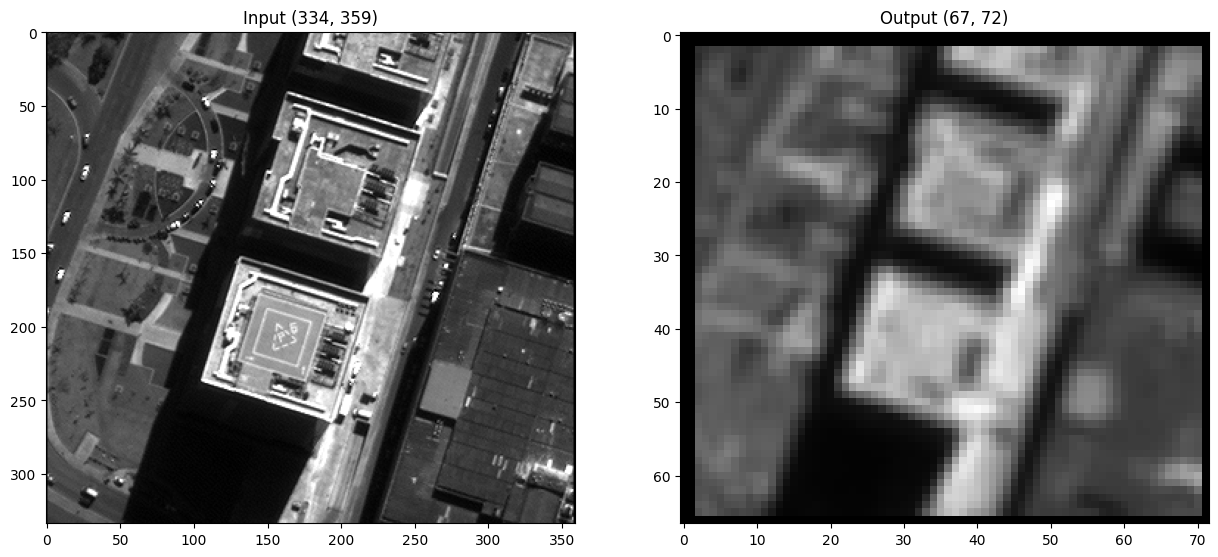

In [ ]:
stride = 5

# create convolution matrix with reduced
# size, considering the stride
conv_matrix_stride = np.zeros((int(Height/stride) + 1, int(Width/stride) + 1)).astype(int)

# the row/column variables iterate over input_matrix
# the row_stride/column_stride iterate over conv_matrix_stride
row_stride = int(half_kernel_height / stride) + 1
for row in range(half_kernel_height, Height - half_kernel_height, stride):
  column_stride = int(half_kernel_width / stride) + 1
  for column in range(half_kernel_width, Width - half_kernel_width, stride):
    sub_matrix = input_matrix[row - half_kernel_height : row + half_kernel_height + 1,
                              column - half_kernel_width : column + half_kernel_height + 1]
    conv_matrix_stride[row_stride, column_stride] = np.dot(sub_matrix.flatten(), average_kernel_flatten)
    column_stride = column_stride + 1
  row_stride = row_stride + 1

# display input and output
plt.figure(figsize=(15, 35))
plt.subplot(121)
plt.imshow(input_matrix, cmap = 'gray')
plt.title('Input ' + str(input_matrix.shape))

plt.subplot(122)
plt.imshow(conv_matrix_stride, cmap = 'gray')
plt.title('Output ' + str(conv_matrix_stride.shape))

plt.show()

# Exercise 3

Create a convolution kernel called `high_pass_kernel` as a `numpy array` with the following weights:

```
-1 -1 -1 -1 -1
 2  2  2 -1 -1
-1  2  2  2 -1
-1 -1 -1  2  2
-1 -1 -1 -1 -1
```

then apply it to `raster_filename`.

Display, using `matplotlib`, the input (`rio_matrix`) image, the output (`conv_matrix`) image, and the kernel.

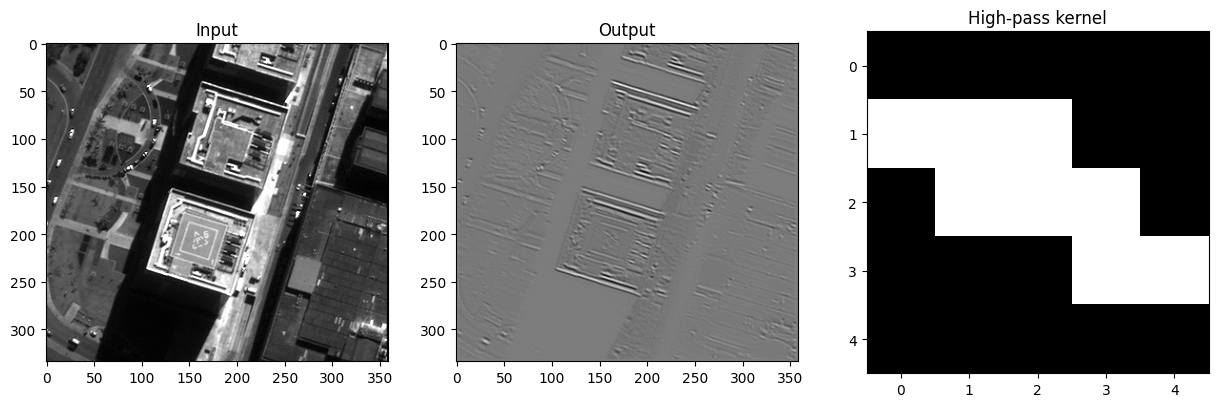

In [ ]:
import numpy as np

input_matrix = rio_matrix
Height = input_matrix.shape[0]
Width = input_matrix.shape[1]

# define kernel and its flattened version
# to be used in convolution
high_pass_kernel = np.array([[-1, -1, -1, -1, -1],
                             [ 2,  2,  2, -1, -1],
                             [-1,  2,  2,  2, -1],
                             [-1, -1, -1,  2,  2],
                             [-1, -1, -1, -1, -1]])
high_pass_kernel_flatten = high_pass_kernel.flatten()

# parameters
kernel_height = high_pass_kernel.shape[0]
kernel_width = high_pass_kernel.shape[1]
N = kernel_height * kernel_width
half_kernel_height = int(kernel_height / 2)
half_kernel_width = int(kernel_width / 2)

# create convolution matrix with zeros and
# the same size of input_matrix
conv_matrix = np.zeros_like(input_matrix).astype(int)
for row in range(half_kernel_height, Height - half_kernel_height):
  for column in range(half_kernel_width, Width - half_kernel_width):
    sub_matrix = input_matrix[row - half_kernel_height : row + half_kernel_height + 1,
                              column - half_kernel_width : column + half_kernel_height + 1]
    conv_matrix[row, column] = np.dot(sub_matrix.flatten(), high_pass_kernel_flatten)

# display input and output
plt.figure(figsize=(15, 35))
plt.subplot(131)
plt.imshow(input_matrix, cmap = 'gray')
plt.title('Input')

plt.subplot(132)
plt.imshow(conv_matrix, cmap = 'gray')
plt.title('Output')

plt.subplot(133)
plt.imshow(high_pass_kernel, cmap = 'gray')
plt.title('High-pass kernel')

plt.show()

# Morphological image processing
---

> *This section is based on [gonzalez2002].*

Mathematical morphology is used in Digital Image Processing as a tool for extracting image components that are useful in the representation and description of region shape, like boundaries.

Morphology basically uses the sets theory and logic operations. The primitive operations for morphological processing are called *dilation* and *erosion*.

Those operations are based on a kernel, also known as *structuring element*, indicating which pixels will be considered (when kernel = 1) and which will not be considered (kernel = 0) in the original image.

Examples:

```
0 1 0
1 1 1
0 1 0

1 1 1
0 0 0
0 0 0
```

## Dilation

$(f \oplus b)(s,t)=\max\{f(s - x, t - y) + b(x, y) | (s - x), (t - y) \in D_f; (x, y) \in D_b\}$

where $D_f$ and $D_b$ are the domains of $f$ and $b$.

Since the $\max$ operation is applied, the output image will be brighter than the original.

## Erosion

$(f \ominus b)(s,t)=\min\{f(s + x, t + y) - b(x, y) | (s + x), (t + y) \in D_f; (x, y) \in D_b\}$

where $D_f$ and $D_b$ are the domains of $f$ and $b$.

Since the $\min$ operation is applied, the output image will be darker than the original.

# Exercise 4

Apply a $3 \times 3$ kernel filled with 1's, with two different operations: the first with dilation, and the second with erosion.

Display, using `matplotlib` input (`rio_matrix`) and output (`dilation_matrix` and `erosion_matrix`) images.

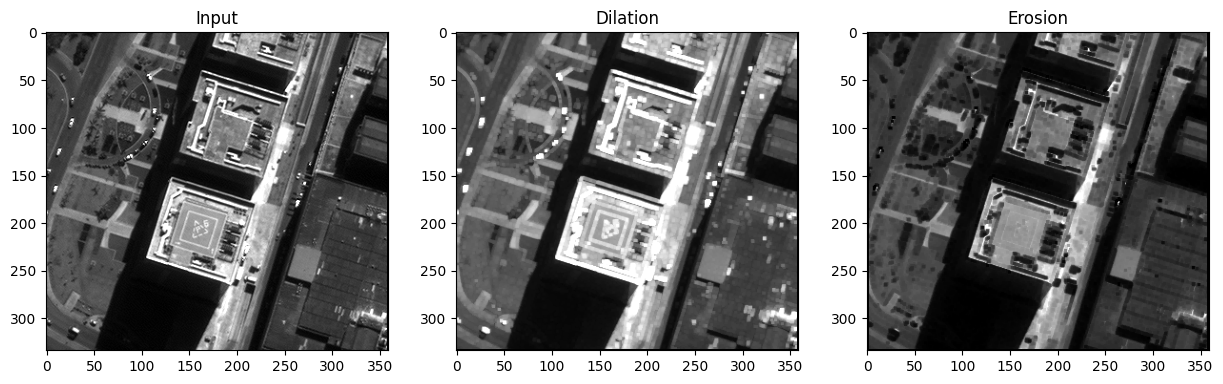

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

input_matrix = rio_matrix
Height = input_matrix.shape[0]
Width = input_matrix.shape[1]

# define kernels for dilation and erosion
kernel =  np.ones((3, 3))

# parameters
kernel_height = kernel.shape[0]
kernel_width = kernel.shape[1]
N = kernel_height * kernel_width
half_kernel_height = int(kernel_height / 2)
half_kernel_width = int(kernel_width / 2)

# create dilation and erosion matrices with zeros and
# the same size of input_matrix
dilation_matrix = np.zeros_like(input_matrix).astype(int)
erosion_matrix = np.zeros_like(input_matrix).astype(int)
for row in range(half_kernel_height, Height - half_kernel_height):
  for column in range(half_kernel_width, Width - half_kernel_width):
    sub_matrix = input_matrix[row - half_kernel_height : row + half_kernel_height + 1,
                              column - half_kernel_width : column + half_kernel_height + 1]

    dilation_matrix[row, column] = np.max(sub_matrix + kernel)
    erosion_matrix[row, column] = np.min(sub_matrix - kernel)

# display input and output
plt.figure(figsize=(15, 35))
plt.subplot(131)
plt.imshow(input_matrix, cmap = 'gray')
plt.title('Input')

plt.subplot(132)
plt.imshow(dilation_matrix, cmap = 'gray')
plt.title('Dilation')

plt.subplot(133)
plt.imshow(erosion_matrix, cmap = 'gray')
plt.title('Erosion')

plt.show()

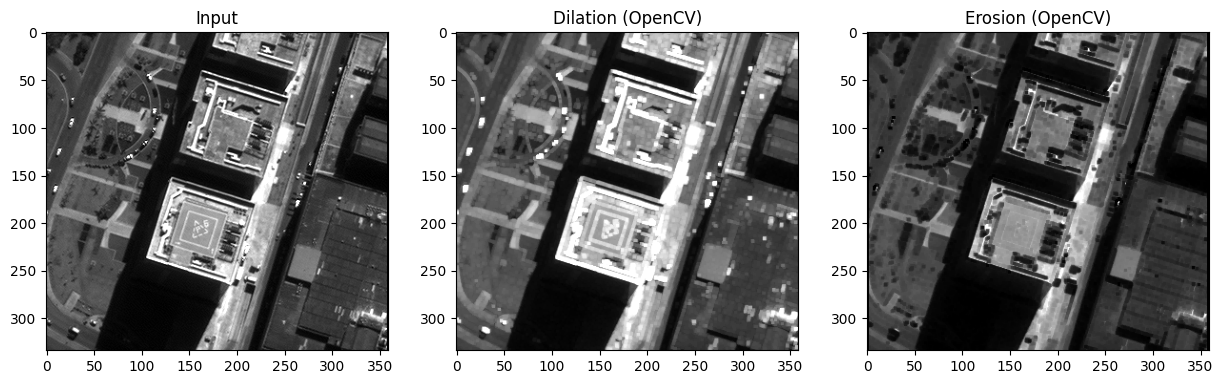

In [ ]:
# using opencv
# http://www.opencv.org.cn/opencvdoc/2.3.2/html/modules/imgproc/doc/filtering.html?highlight=filter2d#dilate
import cv2
kernel = np.ones((3, 3), np.uint8)

dilation_matrix_opencv = cv2.dilate(input_matrix, kernel)
erosion_matrix_opencv = cv2.erode(input_matrix, kernel)

# display input and output
plt.figure(figsize=(15, 35))
plt.subplot(131)
plt.imshow(input_matrix, cmap = 'gray')
plt.title('Input')

plt.subplot(132)
plt.imshow(dilation_matrix_opencv, cmap = 'gray')
plt.title('Dilation (OpenCV)')

plt.subplot(133)
plt.imshow(erosion_matrix_opencv, cmap = 'gray')
plt.title('Erosion (OpenCV)')

plt.show()

# References

[chollet2018] **Deep Learning with Phyton**. François Chollet. https://livebook.manning.com/book/deep-learning-with-python/

[gonzalez2002] Gonzalez, Rafael C., Richard E. Woods. **Digital image processing**.